In [1]:
import sympy as sp
from sympy import *
init_printing()

#### Defining a matrix

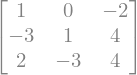

In [2]:
A = Matrix([
      [1, 0, -2]
    , [-3, 1, 4]
    , [2, -3, 4]
])
A

#### Defining a Vector

In [3]:
v = Matrix([1, 2, 3, 4])
v

#### The Identity Matrix

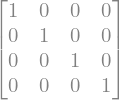

In [4]:
n = 4 # size of the n x n Matrix
I = eye(n)
I

#### Join Two Matrices

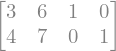

In [7]:
A = Matrix([
      [3, 6]
    , [4, 7]
])
I = eye(2)
A_I = A.row_join(I)
A_I

#### Basic Arithmetic Operations

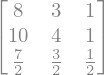

In [8]:
A = Matrix([
      [1, 0, -2]
    , [-3, 1, 4]
    , [2, -3, 4]
])

B = randMatrix(3, max = 9, seed = 0, percent = 100)

# Scaling
2*A

# Multiply two Matrices
A*B

# Transpose
A.T

# Inverse
A**-1

# or
A.inv()

#### Determinant and Transpose

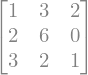

In [9]:
# Determinant
M = Matrix(( [1, 2, 3], [3, 6, 2], [2, 0, 1] ))
M.det()

# Transpose
M.T

#### Echelon form: 0's below and to the left of pivots

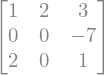

In [10]:
M = Matrix(( [1, 2, 3], [3, 6, 2], [2, 0, 1] ))
# r2 becomes r2-3r1
M[1,:] = M[1,:]-3*M[0,:]
M

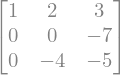

In [11]:
# r3 becomes r3-2r1
M[2,:] = M[2,:]-2*M[0,:]
M

In [12]:
# Swap row 2 and 3
M.row_swap(1,2)

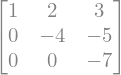

In [13]:
M

In [14]:
# You can use the LU decomposition to obtain echelon form
M = Matrix(( [1, 2, 3], [3, 6, 2], [2, 0, 1] ))
L, U, perm = M.LUdecomposition() # Perm is the is a list of row swap index pairs s.t. A = (L*U).permuteBkwd(perm)

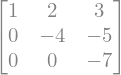

In [15]:
U

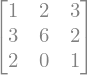

In [16]:
(L*U).permuteBkwd(perm)

#### Reduced Echelon Form

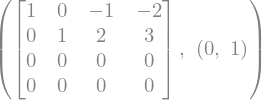

In [17]:
# Note, returns a tuple of two elements, the first being the reduced form, the other being the pivot columns
M = Matrix(([1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]))
M.rref()

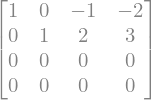

In [18]:
# If you only want the reduced matrix, you can do the following
M = Matrix(([1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]))
M_rref, _ = M.rref()
M_rref

#### Working with unknowns such a or x, etc.

In [19]:
a = sp.Symbol('a') # you need to define the variables as symbols

In [20]:
# Find a such that det A = 24
A = Matrix([
      [a, 3, -1, 0, -2]
    , [0, 2, -4, -1, -6]
    , [-2, -6, 2, 3, 9]
    , [3, 7, -3, 8, -7]
    , [3, 5, 5, 2, 7]  
])
solve(A.det()-24,a)

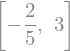

In [21]:
# Find a such that det A = -18
A = Matrix([
      [1, 5, -a]
    , [a, -a, a]
    , [2, 13, -7]
])
solve(A.det()+18,a)

#### Indexing

In [22]:
# Remember that Python uses 0-based indexing and so does Sympy

# Get a entry (2,2), i.e. row 2 column 2. In Python this would be (1,1)

M = Matrix(([1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]))
M[1,1]

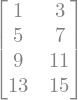

In [23]:
# Select a specific column or row

# Column 2
M[:,1]
# or
M.col(1)

# Row 2
M[1,:]
# or
M.row(1)

# Column 2 to end
M[:,1:]

# All columns before column 2 - note column 2 is NOT included
M[:,:1]

# Column 1 and 3
M[:,(0,2)]

#### Cofactors

In [24]:
# Often, you will be asked to find the determinant or an unknown value using cofactor expansion.
# Sympy has a method for cofactors (i.e. the part with the sign and the determinant of the submatrix)

# Find the determinant of A using cofactor expansion a long the second column
A = Matrix([
      [3, 0, 4]
    , [2, 3, 2]
    , [0, 5, -1]
])
A[0,1]*A.cofactor(0,1)+A[1,1]*A.cofactor(1,1)+A[2,1]*A.cofactor(2,1)

In [25]:
# Same as above but using indexing and determinant
-A[0,1]*A[1:,(0,2)].det()+A[1,1]*A[(0,2),(0,2)].det()-A[2,1]*A[:2,(0,2)].det()

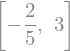

In [26]:
# Find a such that det A = -18 using cofactor expansion a long the second row
A = Matrix([
      [1, 5, -a]
    , [a, -a, a]
    , [2, 13, -7]
])
solve(
A[1,0]*A.cofactor(1,0)+A[1,1]*A.cofactor(1,1)+A[1,2]*A.cofactor(1,2)+18,a
)

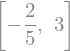

In [27]:
# Same as above but using indexing and determinant
solve(
-A[1,0]*A[(0,2),1:].det()+A[1,1]*A[(0,2),(0,2)].det()-A[1,2]*A[(0,2),(0,1)].det()+18,a
)

#### Nullspace and Colspace - actually bases!

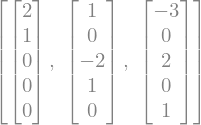

In [28]:
# Basis for nullspace (returns a list of vectors)
A = Matrix([
      [-3, 6, -1, 1, -7]
    , [1, -2, 2, 3, -1]
    , [2, -4, 5, 8, -4]
    
])
A.nullspace()

In [29]:
 # To get the vectors as independent vector
v1, v2, v3 = A.nullspace()

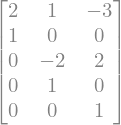

In [30]:
# To create a matrix from these
V = v1.row_join(v2).row_join(v3)
V

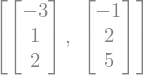

In [31]:
# Basis for colspace
A.columnspace()

In [32]:
_ , pivots = A.rref()
pivots # It can be seen that the pivots are in columns 1 and 3 which correspond to the basis for Col A